### k-Nearest Neighbors

<span style='font-family:TH Baijam;font-size: 135%'>
k-Nearest Neighbors (k-NN) เป็นalgorithm ที่ใช้ในการแก้ปัญหาการจำแนกประเภท(Classification) โดยหลักการของk-NNคือ การค้นหาตัวอย่างจำนวน k ตัวอย่างที่ใกล้เคียงกับสิ่งที่ต้องการจำแนกประเภท<br>
Algorithm : กำหนดให้ชุดข้อมูลประกอบด้วยตัวอย่างที่ทราบประเภทจำนวน 9 ตัวอย่าง(1-9) และมีตัวอย่างที่ไม่ทราบประเภทอีก 1 ตัวอย่าง โดยมีการกระจายตัวดังรูป<br>
<img src="./data/sample_space.jpg" alt="sample" width="30%"><br>
จากภาพข้างต้น กำหนดให้ตัวอย่างที่ 1-3 เป็นประเภท B, 4-6 เป็นประเภท G, 7-9 เป็นประเภท R ถ้าเราต้องการทราบประเภทของ X ด้วย k-NN algorithm สามารถทำได้ดังนี้<br>
1. กำหนดค่า k ซึ่งหมายถึงจำนวนตัวอย่างที่ใกล้เคียงกับตัวอย่างที่ต้องการจำแนกประเภท<br>
2. กำหนดวิธีการวัดความใกล้เคียง(หรือความเหมือน) ซึ่งโดยทั่วไปจะใช้ Euclidean distance หรือ Manhattan distance<br>
3. นับจำนวนตัวอย่างที่ใกล้เคียงที่สุด k ตัว แล้วดูว่าใน k ตัวนั้นมีตัวอย่างประเภทใดมีมากที่สุด, ตัวอย่างนั้นก็คือคำตอบว่า X คือประเภทอะไร<br>
ซึ่งในความเป็นจริงนั้น k-NN ไม่ได้ใช้ในการจำแนกประเภทเท่านั้น แต่ยังสามารถใช้ในการทำนายค่าต่างๆได้อีกด้วย เช่น การทำนายราคาของบ้าน การทำนายอายุของคน หรือการทำนายอื่นๆที่เป็นตัวเลขได้<br>
ยกตัวอย่างการประยุกต์ใช้งาน โดยให้ข้อมูลดอกไอริส 3 สายพันธุ์ คือ Setosa, Versicolor และ Virginica<br>
</span>


Accuracy:  0.9833333333333333
This graph shows the test data with the actual labels and the predicted labels
The actual labels are shown as circles and the predicted labels are shown as crosses


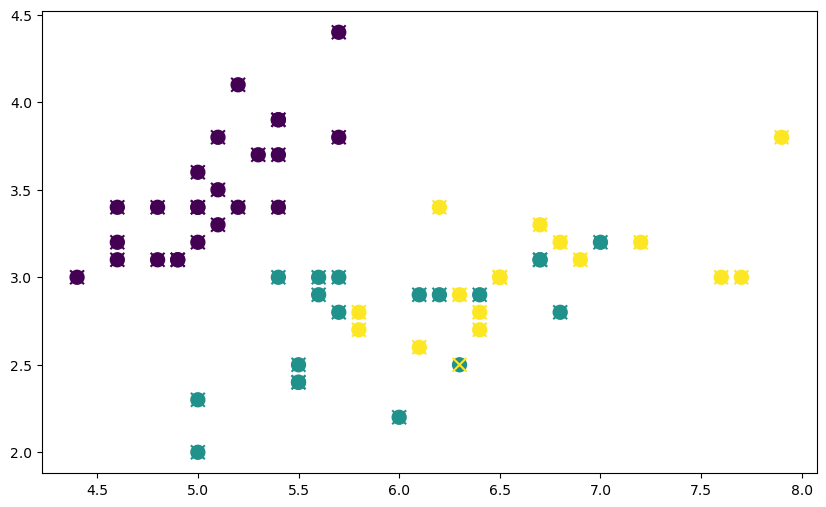

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(97861648)


def load(path='./data/iris.data'):
    iris = pd.read_csv(path)
    iris.columns = ['sepal_length', 'sepal_width',
                    'petal_length', 'petal_width', 'class']
    iris['class'] = iris['class'].astype('category').cat.codes
    # 0 = Iris-setosa, 1 = Iris-versicolor, 2 = Iris-virginica
    return iris


def split(test_size):
    iris = load().values
    np.random.shuffle(iris)
    test_size = int(len(iris) * test_size)
    test = iris[:test_size, :]
    train = iris[test_size:, :]
    X_test, Y_test = test[:, :4], test[:, -1]
    X_train, Y_train = train[:, :4], train[:, -1]
    return X_train, Y_train, X_test, Y_test


def kNN(X_train,Y_train,X_test,k=3):
    Y_test = []
    for x in X_test:
        dist = np.sqrt(np.sum((X_train - x)**2,axis=1))
        idx = np.argsort(dist)
        (values,counts) = np.unique(Y_train[idx[:k]],return_counts=True)
        ind = np.argmax(counts)
        Y_test.append(values[ind])
    return Y_test

if __name__ == '__main__':
    X_test, Y_test, X_train, Y_train = split(0.6)
    Y_pred = kNN(X_train,Y_train,X_test)
    print('Accuracy: ',np.sum(Y_pred==Y_test)/len(Y_test))
    print("This graph shows the test data with the actual labels and the predicted labels")
    print("The actual labels are shown as circles and the predicted labels are shown as crosses")
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, marker='o', s=100)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred, marker='x', s=100)
    plt.show()